In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

# Set the seed value
seed_value = 42
random.seed(seed_value)

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', None)  # None means unlimited rows
pd.set_option('display.max_columns', None)

In [73]:
!pip install ucimlrepo 
from ucimlrepo import fetch_ucirepo
# fetch dataset
adult = fetch_ucirepo (id=2)
# data (as pandas ditaframes)
X = adult.data.features
y = adult.data.targets

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [74]:
X.shape

(48842, 14)

In [75]:
y.shape

(48842, 1)

In [76]:
X.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [77]:
y.head(10)

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


In [78]:
#Join X and y
df=X.join(y)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [80]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


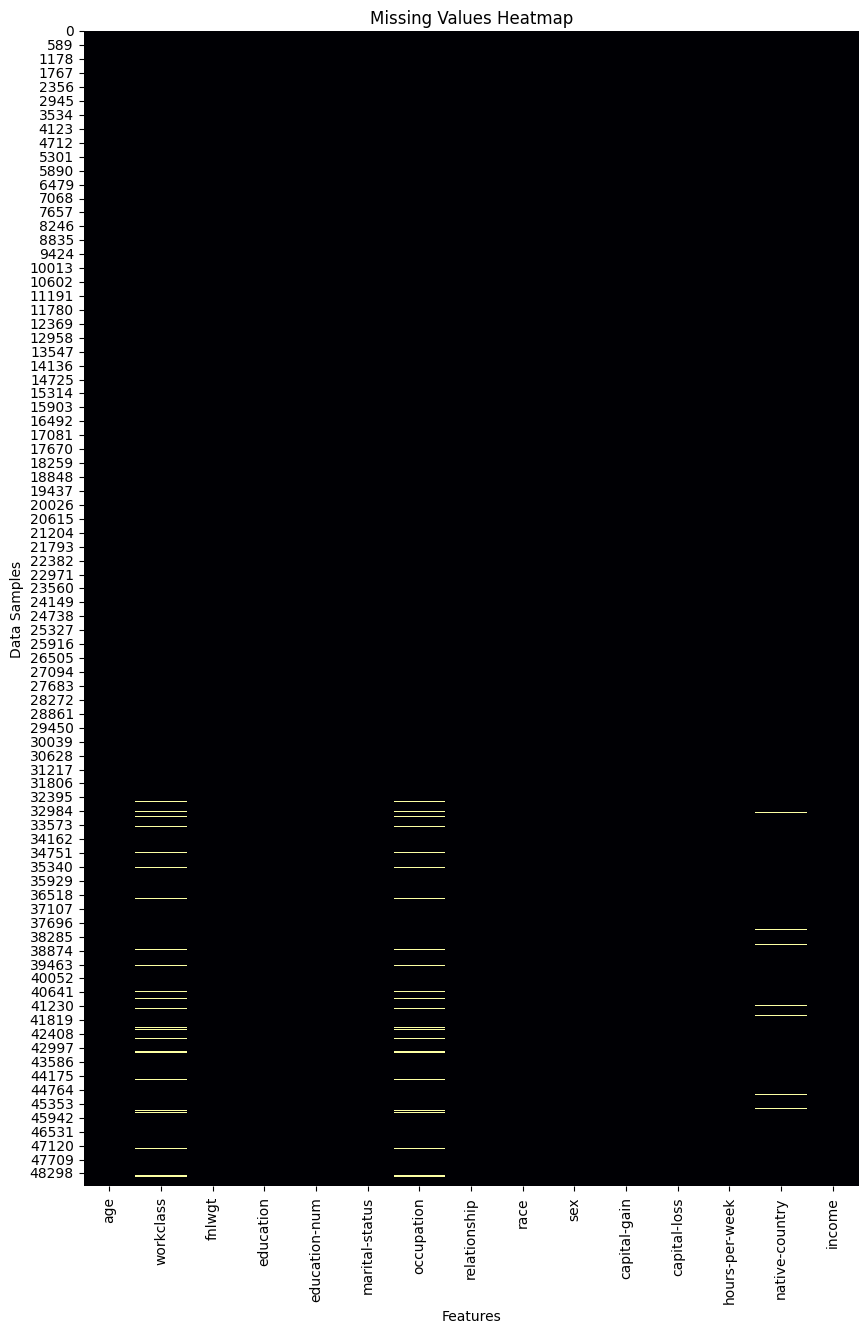

In [81]:
plt.figure(figsize=(10, 15))
sns.heatmap(df.isnull(), cbar=False, cmap='inferno')
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Samples')
plt.show()

In [82]:
null_counts = df.isnull().sum()
# Calculate percentages
null_percentages = (df.isnull().sum() / len(X)) * 100

# Concatenate null counts and percentages into a DataFrame
null_info = pd.concat([null_counts, null_percentages], axis=1)
null_info.columns = ['Null Count', 'Null Percentage']
null_info

,Null Count,Null Percentage
age,0,0.000000
workclass,963,1.971664
fnlwgt,0,0.000000
education,0,0.000000
education-num,0,0.000000
marital-status,0,0.000000
occupation,966,1.977806
relationship,0,0.000000
race,0,0.000000
sex,0,0.000000


In [83]:
def value_counts_(selected_column):
    # Get value counts
    value_counts = selected_column.value_counts()
    # Get the maximum count
    max_count = value_counts.max()
    # Calculate the ratio of the highest count for each value
    ratio_highest_count = value_counts / max_count
    # Combine value counts and ratios into a DataFrame
    result_df = pd.DataFrame({'value_counts': value_counts, 'ratio_to_highest_value_count': ratio_highest_count})
    print(result_df)

### Workclass null value handle

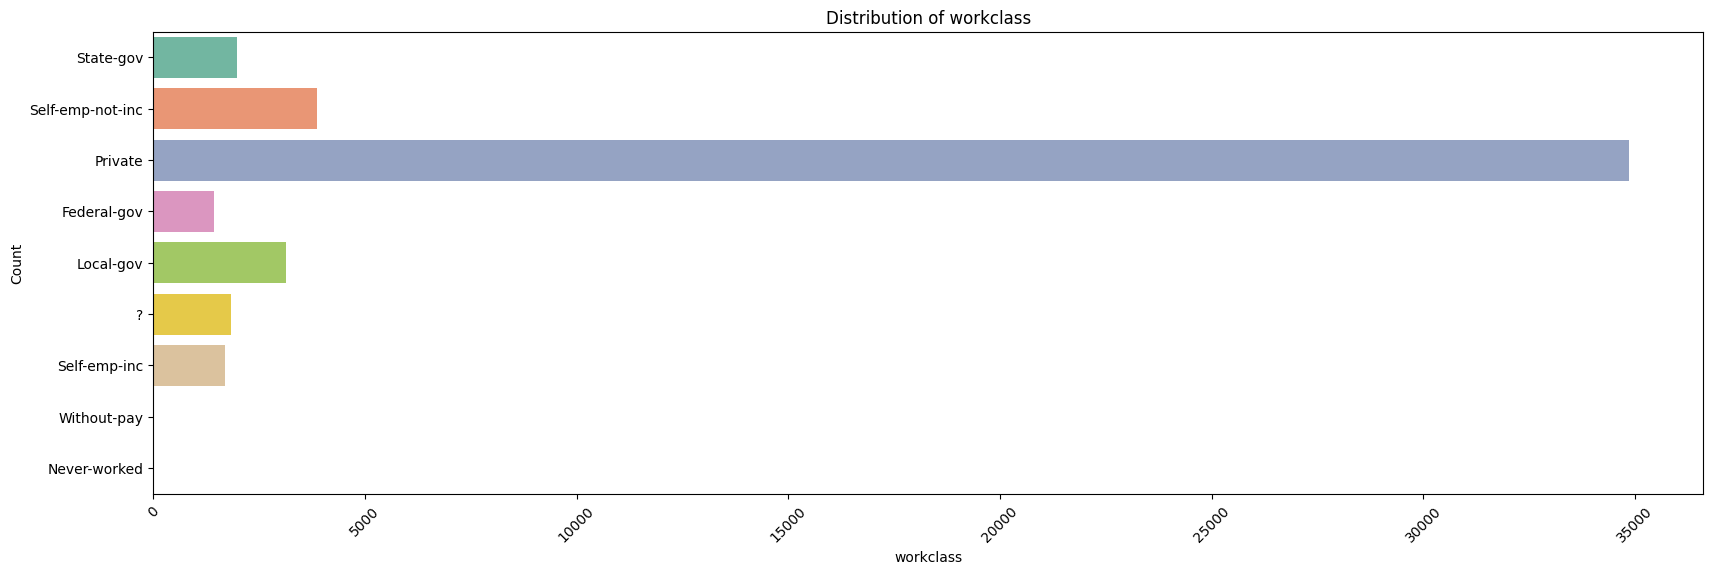

                  value_counts  ratio_to_highest_value_count
workclass                                                   
Private                  34869                      1.000000
Self-emp-not-inc          3862                      0.110757
Local-gov                 3136                      0.089937
State-gov                 1981                      0.056813
?                         1836                      0.052654
Self-emp-inc              1695                      0.048611
Federal-gov               1432                      0.041068
Without-pay                 21                      0.000602
Never-worked                10                      0.000287


In [88]:
plt.figure(figsize=(20, 6))
sns.countplot(y=df['workclass'], palette='Set2')
plt.title(f'Distribution of workclass')
plt.xlabel('workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(df['workclass'])

In [86]:
# Replace missing values with mode
mode_value = df['workclass'].mode()[0]
df['workclass'].fillna(mode_value, inplace=True)

print('Null value count: ', df['workclass'].isnull().sum())

Null value count:  0


In [143]:
#Replacing ? with mode
def function(value):
    if value=='?':
        return mode_value
    else:
        return value

In [144]:
df['workclass']=df['workclass'].apply(function)

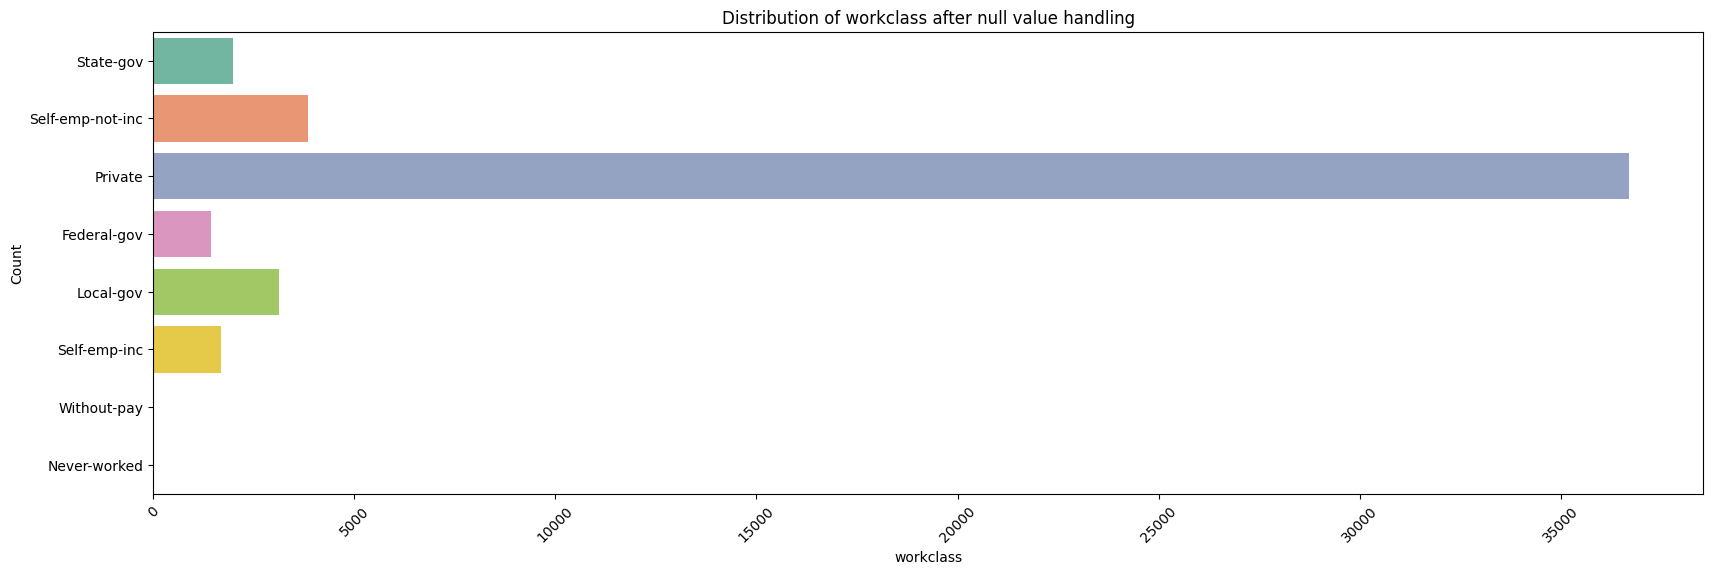

                  value_counts  ratio_to_highest_value_count  percentage
workclass                                                               
Private                  36705                      1.000000   75.150485
Self-emp-not-inc          3862                      0.105217    7.907129
Local-gov                 3136                      0.085438    6.420703
State-gov                 1981                      0.053971    4.055935
Self-emp-inc              1695                      0.046179    3.470374
Federal-gov               1432                      0.039014    2.931903
Without-pay                 21                      0.000572    0.042996
Never-worked                10                      0.000272    0.020474


In [145]:
plt.figure(figsize=(20, 6))
sns.countplot(y=df['workclass'], palette='Set2')
plt.title(f'Distribution of workclass after null value handling')
plt.xlabel('workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(df['workclass'])

### occupation null values handle

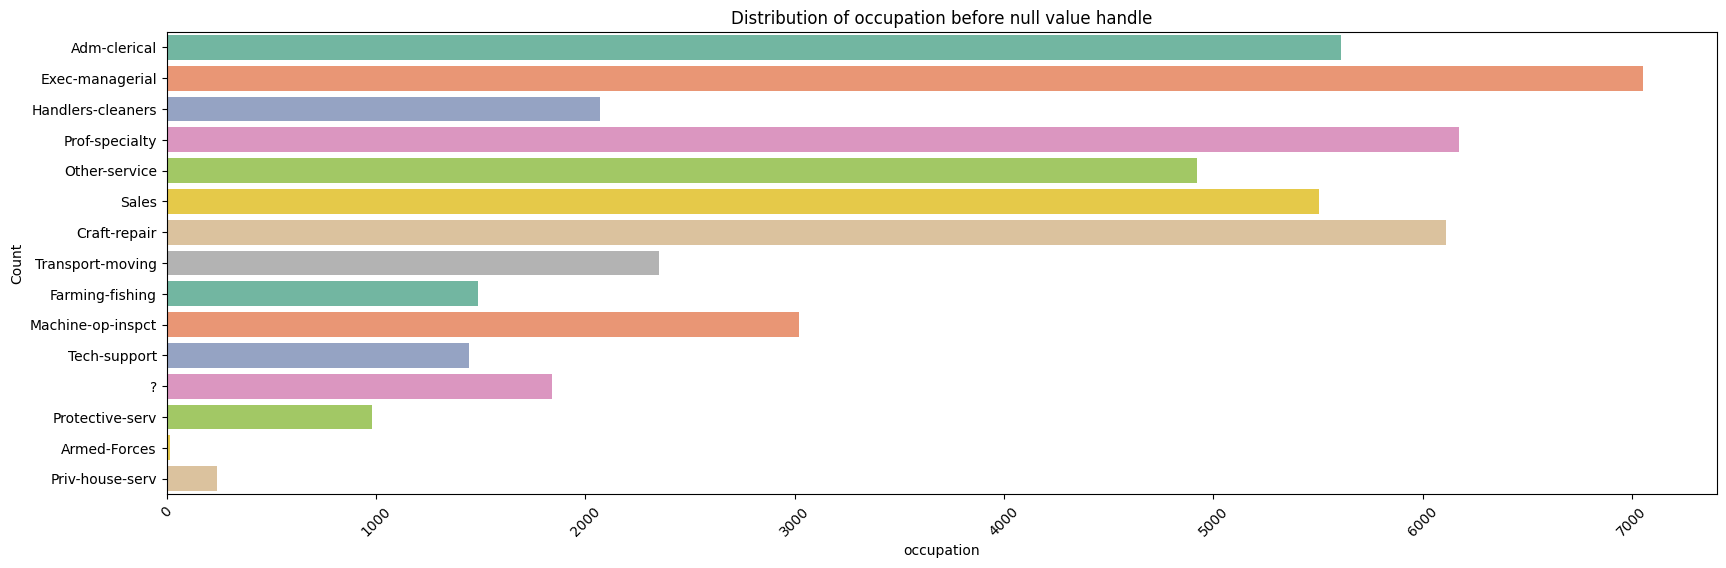

                   value_counts  ratio_to_highest_value_count
occupation                                                   
Exec-managerial            7052                      1.000000
Prof-specialty             6172                      0.875213
Craft-repair               6112                      0.866704
Adm-clerical               5611                      0.795661
Sales                      5504                      0.780488
Other-service              4923                      0.698100
Machine-op-inspct          3022                      0.428531
Transport-moving           2355                      0.333948
Handlers-cleaners          2072                      0.293817
?                          1843                      0.261344
Farming-fishing            1490                      0.211288
Tech-support               1446                      0.205048
Protective-serv             983                      0.139393
Priv-house-serv             242                      0.034317
Armed-Fo

In [92]:
selected_column=df['occupation']
plt.figure(figsize=(20, 6))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of occupation before null value handle')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

In [89]:
replacing_values=['Prof-specialty','Craft-repair','Exec-managerial']
# Replace missing values with mode
df['occupation'].fillna(random.choice(replacing_values), inplace=True)

print('Null value count: ', df['occupation'].isnull().sum())


Null value count:  0


In [146]:
#Replacing ? with mode
def function(value):
    if value=='?':
        return random.choice(replacing_values)
    else:
        return value

In [147]:
df['occupation']=df['occupation'].apply(function)

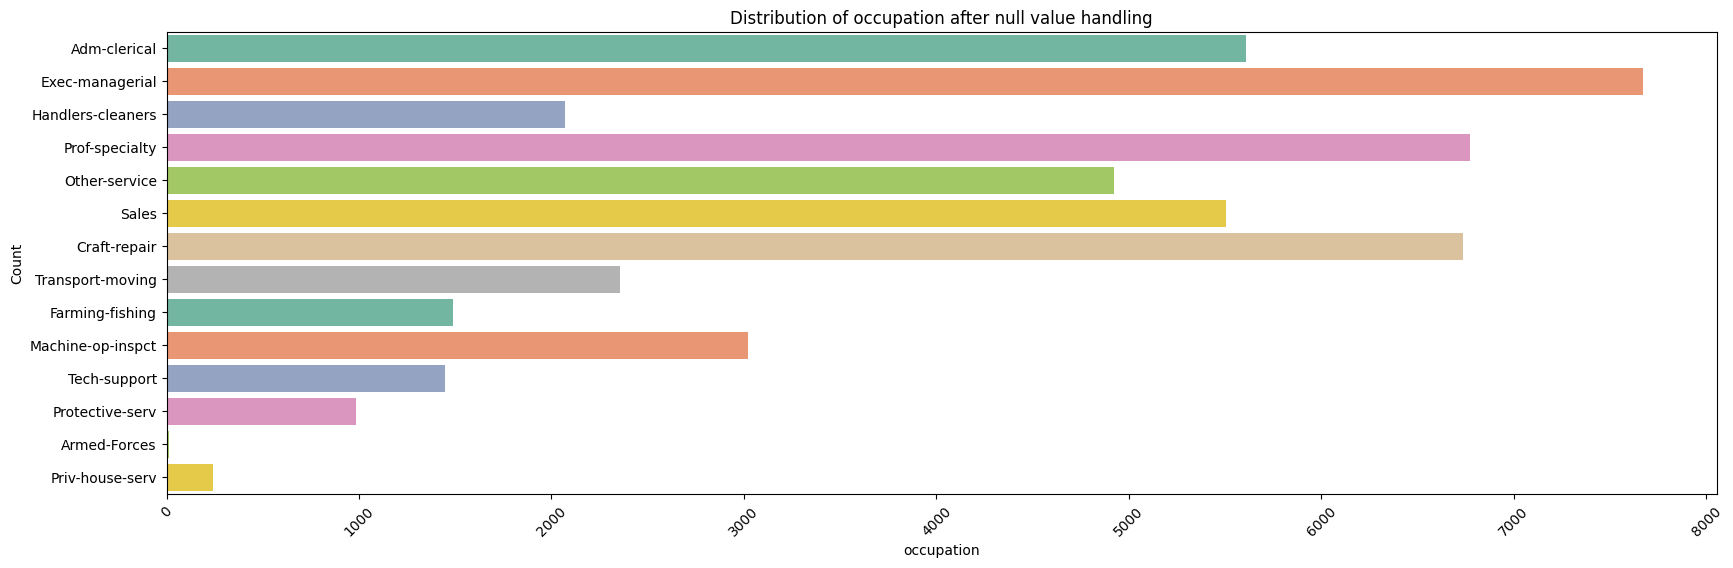

                   value_counts  ratio_to_highest_value_count  percentage
occupation                                                               
Exec-managerial            7670                      1.000000   15.703698
Prof-specialty             6774                      0.883181   13.869211
Craft-repair               6735                      0.878096   13.789362
Adm-clerical               5611                      0.731551   11.488064
Sales                      5504                      0.717601   11.268990
Other-service              4923                      0.641851   10.079440
Machine-op-inspct          3022                      0.394003    6.187298
Transport-moving           2355                      0.307040    4.821670
Handlers-cleaners          2072                      0.270143    4.242251
Farming-fishing            1490                      0.194263    3.050653
Tech-support               1446                      0.188527    2.960567
Protective-serv             983       

In [148]:
selected_column=df['occupation']
plt.figure(figsize=(20, 6))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of occupation after null value handling')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

### native-country null value handling

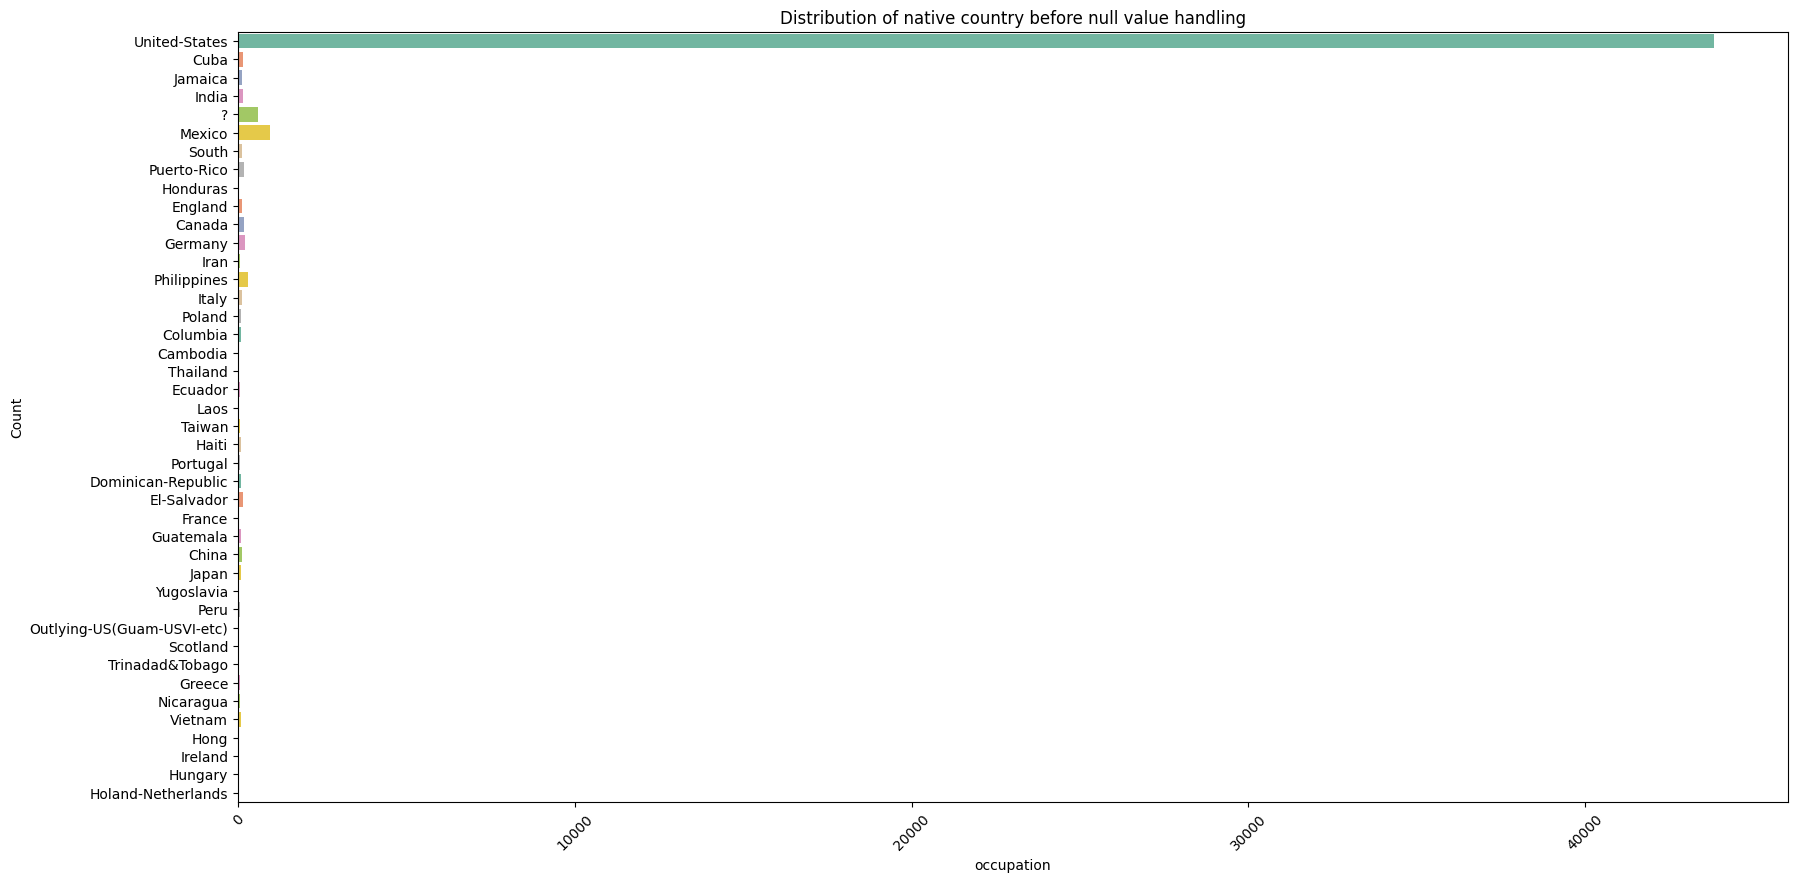

                            value_counts  ratio_to_highest_value_count
native-country                                                        
United-States                      43832                      1.000000
Mexico                               951                      0.021696
?                                    583                      0.013301
Philippines                          295                      0.006730
Germany                              206                      0.004700
Puerto-Rico                          184                      0.004198
Canada                               182                      0.004152
El-Salvador                          155                      0.003536
India                                151                      0.003445
Cuba                                 138                      0.003148
England                              127                      0.002897
China                                122                      0.002783
South 

In [93]:
selected_column=df['native-country']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of native country before null value handling')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

In [95]:
# Replace missing values with mode
mode_value = df['native-country'].mode()[0]
df['native-country'].fillna(mode_value, inplace=True)

print('Null value count: ', df['native-country'].isnull().sum())

Null value count:  0


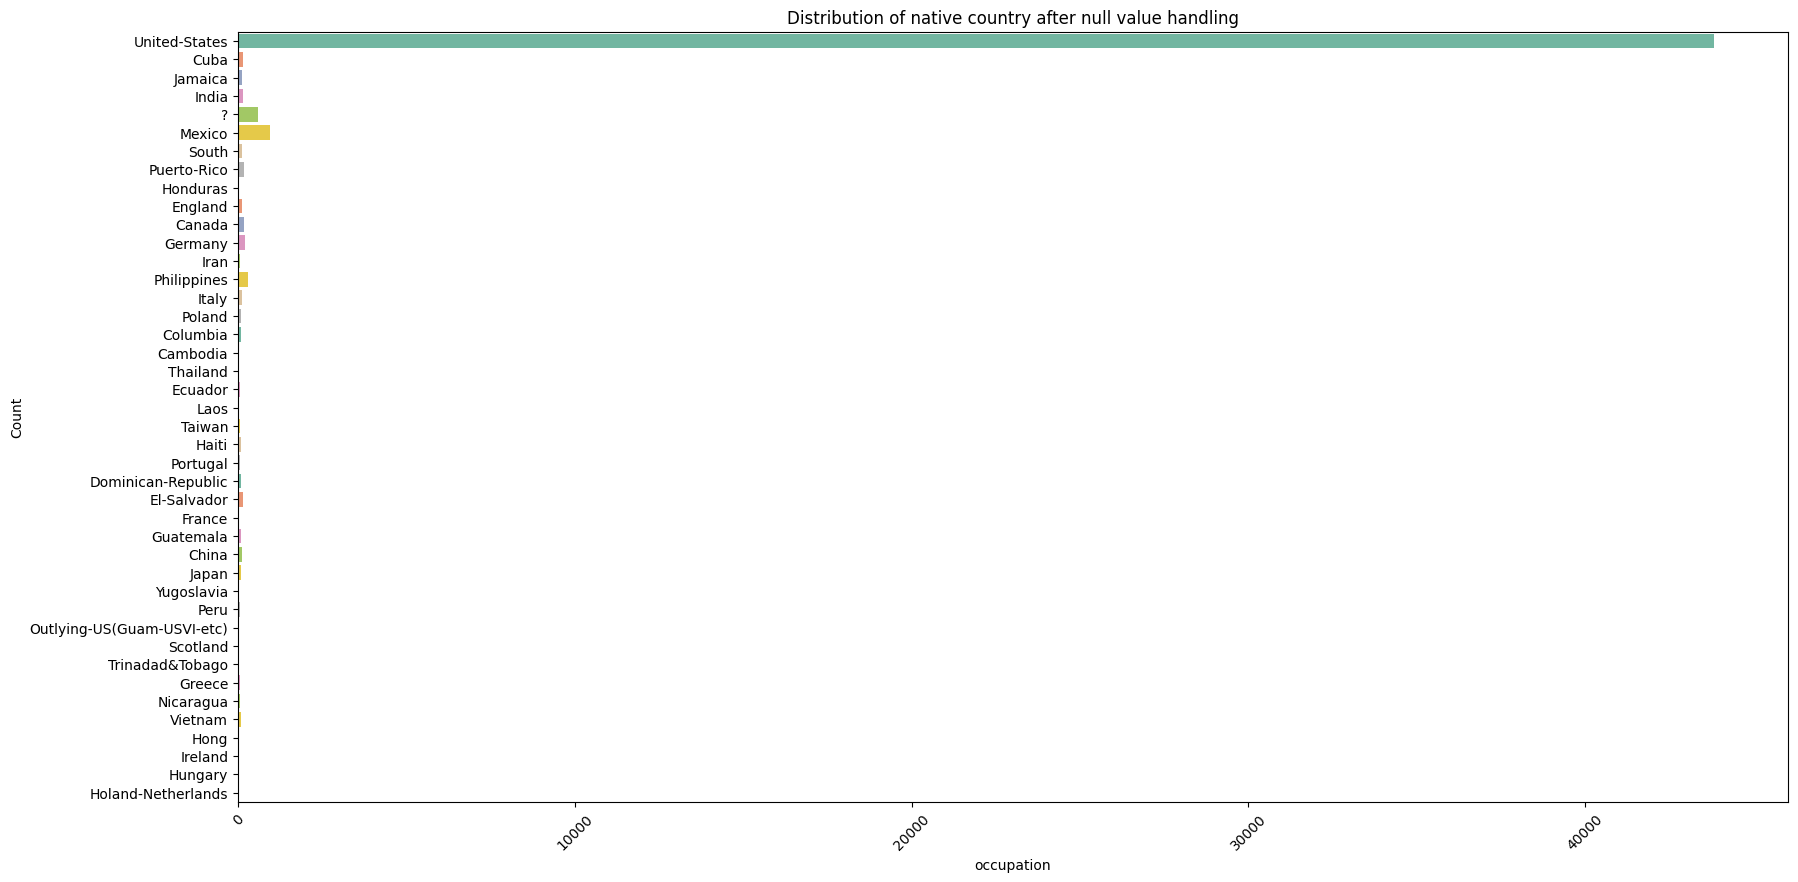

                            value_counts  ratio_to_highest_value_count
native-country                                                        
United-States                      43832                      1.000000
Mexico                               951                      0.021696
?                                    583                      0.013301
Philippines                          295                      0.006730
Germany                              206                      0.004700
Puerto-Rico                          184                      0.004198
Canada                               182                      0.004152
El-Salvador                          155                      0.003536
India                                151                      0.003445
Cuba                                 138                      0.003148
England                              127                      0.002897
China                                122                      0.002783
South 

In [96]:
selected_column=X['native-country']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of native country after null value handling')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

In [97]:
null_counts = df.isnull().sum()
# Calculate percentages
null_percentages = (df.isnull().sum() / len(X)) * 100

# Concatenate null counts and percentages into a DataFrame
null_info = pd.concat([null_counts, null_percentages], axis=1)
null_info.columns = ['Null Count', 'Null Percentage']
null_info

,Null Count,Null Percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


### Feature engineering

In [130]:
def value_counts_(selected_column):
    # Get value counts
    value_counts = selected_column.value_counts()
    # Get the maximum count
    max_count = value_counts.max()
    # Calculate the ratio of the highest count for each value
    ratio_highest_count = value_counts / max_count
    # percentage out 0f whole dataset
    percentage = value_counts / len(df) *100
    # Combine value counts and ratios into a DataFrame
    result_df = pd.DataFrame({'value_counts': value_counts, 'ratio_to_highest_value_count': ratio_highest_count, 'percentage':percentage})
    print(result_df)

In [110]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

## income feature engineering

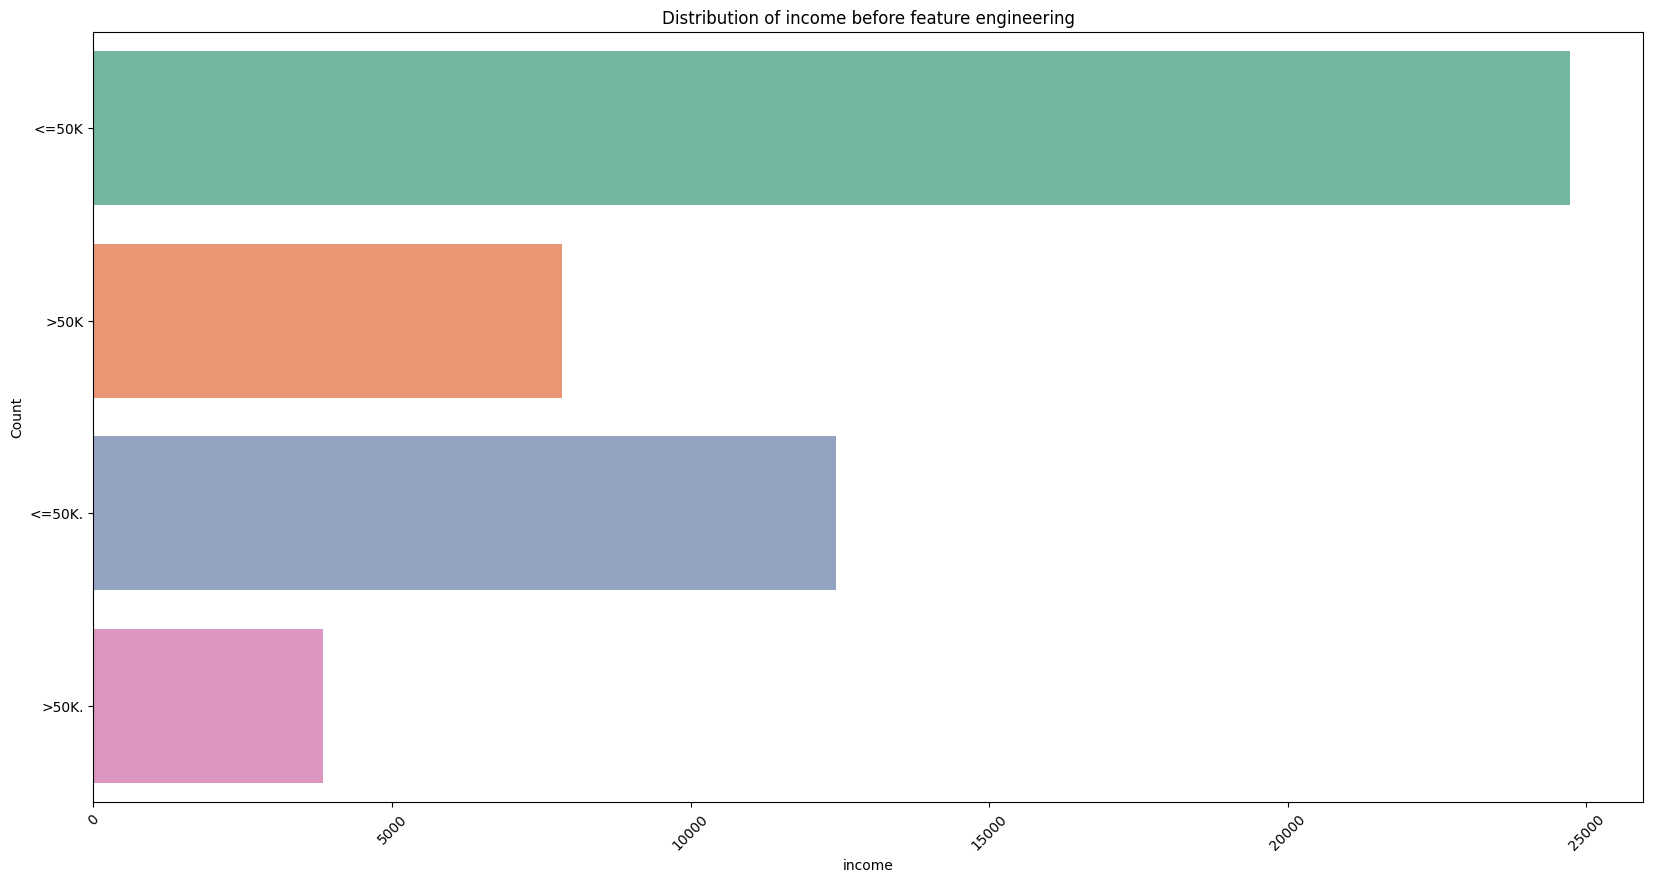

        value_counts  ratio_to_highest_value_count  percentage
income                                                        
<=50K          24720                      1.000000   50.612178
<=50K.         12435                      0.503034   25.459645
>50K            7841                      0.317193   16.053806
>50K.           3846                      0.155583    7.874370


In [134]:
selected_column=df['income']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of income before feature engineering')
plt.xlabel('income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

In [135]:
def process_income(income):
    if income=='<=50K.':
        return '<=50K'
    elif income=='>50K.':
        return '>50K'
    else:
        return income

In [136]:
df['income']=df['income'].apply(process_income)

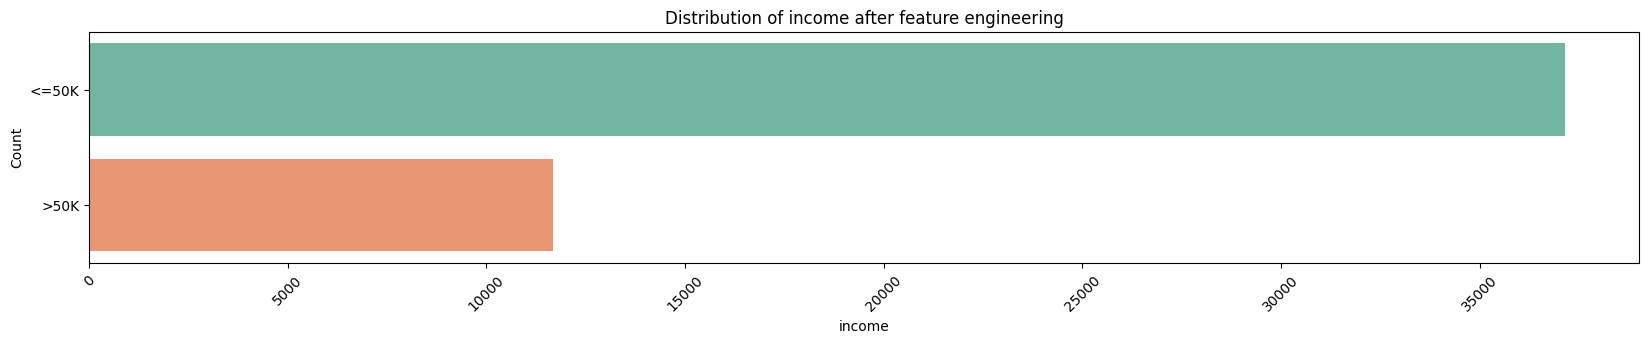

        value_counts  ratio_to_highest_value_count  percentage
income                                                        
<=50K          37155                      1.000000   76.071823
>50K           11687                      0.314547   23.928177


In [138]:
selected_column=df['income']
plt.figure(figsize=(20, 3))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of income after feature engineering')
plt.xlabel('income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

## education feature engineering

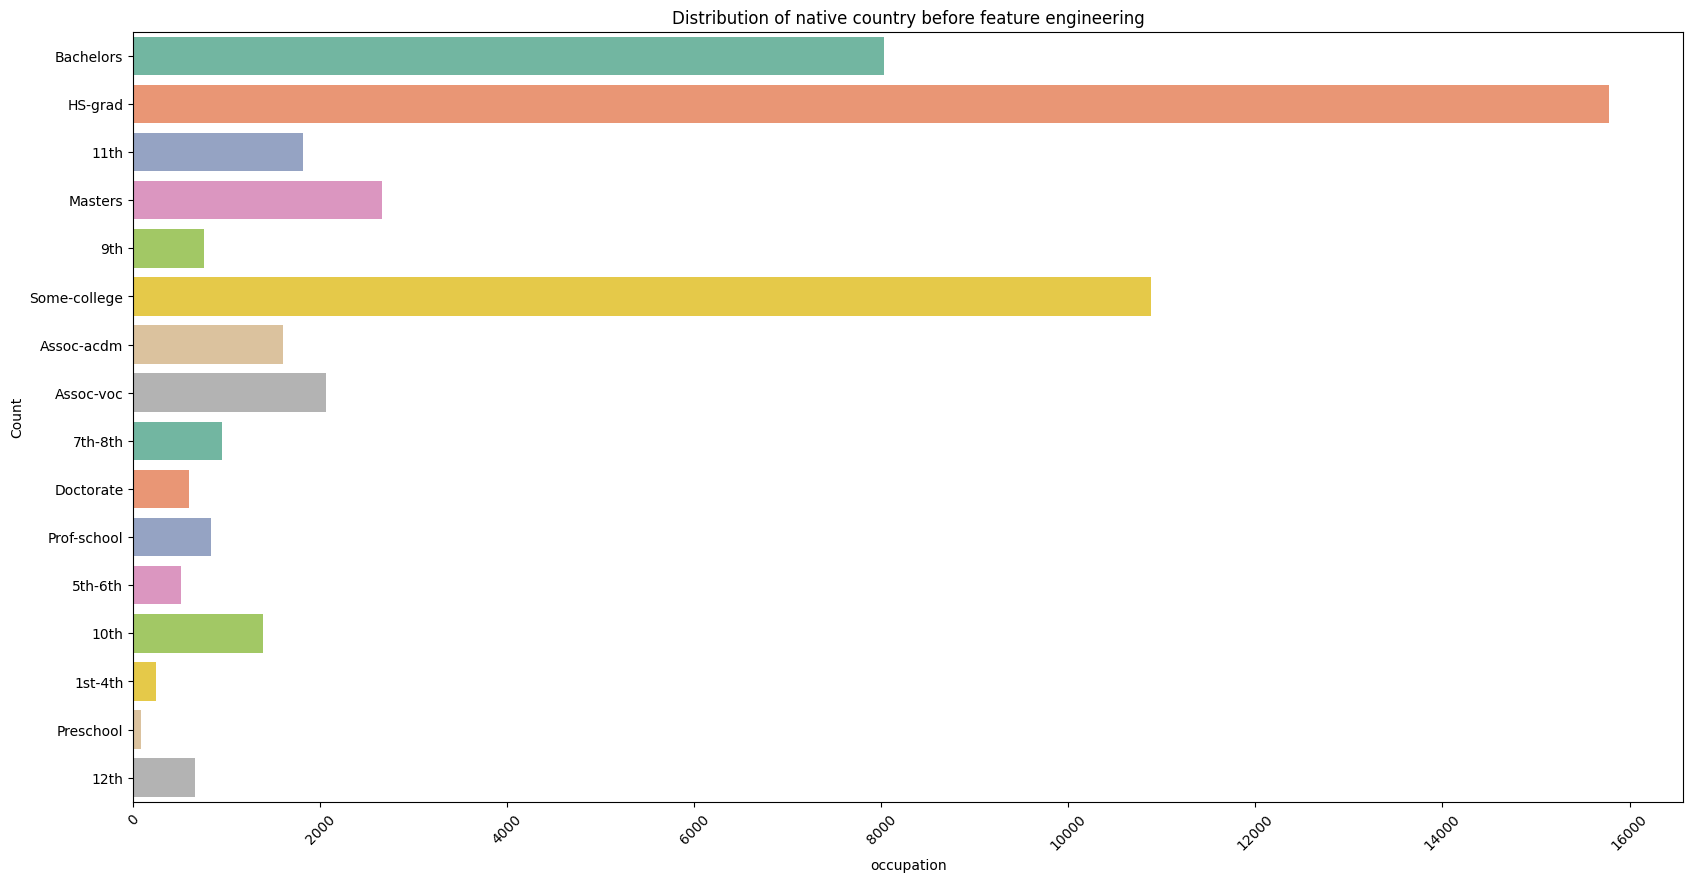

              value_counts  ratio_to_highest_value_count  percentage
education                                                           
HS-grad              15784                      1.000000   32.316449
Some-college         10878                      0.689179   22.271815
Bachelors             8025                      0.508426   16.430531
Masters               2657                      0.168335    5.439990
Assoc-voc             2061                      0.130575    4.219729
11th                  1812                      0.114800    3.709922
Assoc-acdm            1601                      0.101432    3.277917
10th                  1389                      0.088001    2.843864
7th-8th                955                      0.060504    1.955284
Prof-school            834                      0.052838    1.707547
9th                    756                      0.047897    1.547848
12th                   657                      0.041624    1.345154
Doctorate              594        

In [113]:
selected_column=df['education']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of education before feature engineering')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

In [112]:
school_or_below = ['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', '12th', 'Preschool']
college = ['Assoc-voc', 'Assoc-acdm', 'Some-college', 'Prof-school']

def process_education(education):
    if education in school_or_below:
        return 'School-or-below'
    elif education in college:
        return 'College'
    else:
        return education

In [114]:
df['education']=df['education'].apply(process_education)


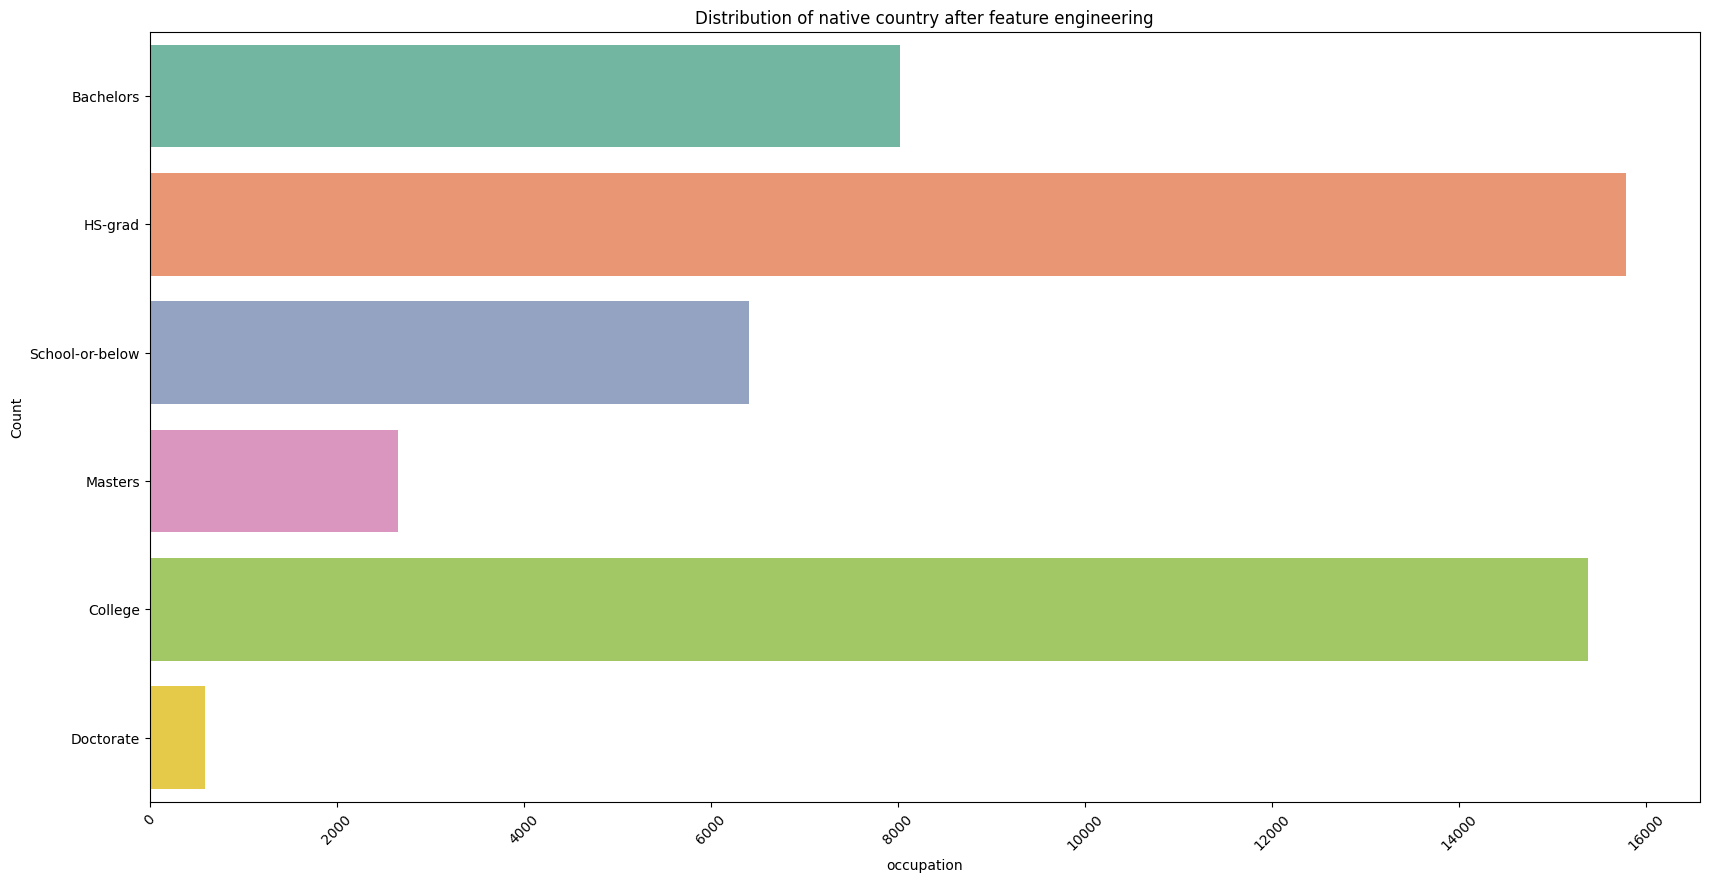

                 value_counts  ratio_to_highest_value_count  percentage
education                                                              
HS-grad                 15784                      1.000000   32.316449
College                 15374                      0.974024   31.477007
Bachelors                8025                      0.508426   16.430531
School-or-below          6408                      0.405981   13.119856
Masters                  2657                      0.168335    5.439990
Doctorate                 594                      0.037633    1.216166


In [115]:
selected_column=df['education']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of education after feature engineering')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

## workclass feature engineering

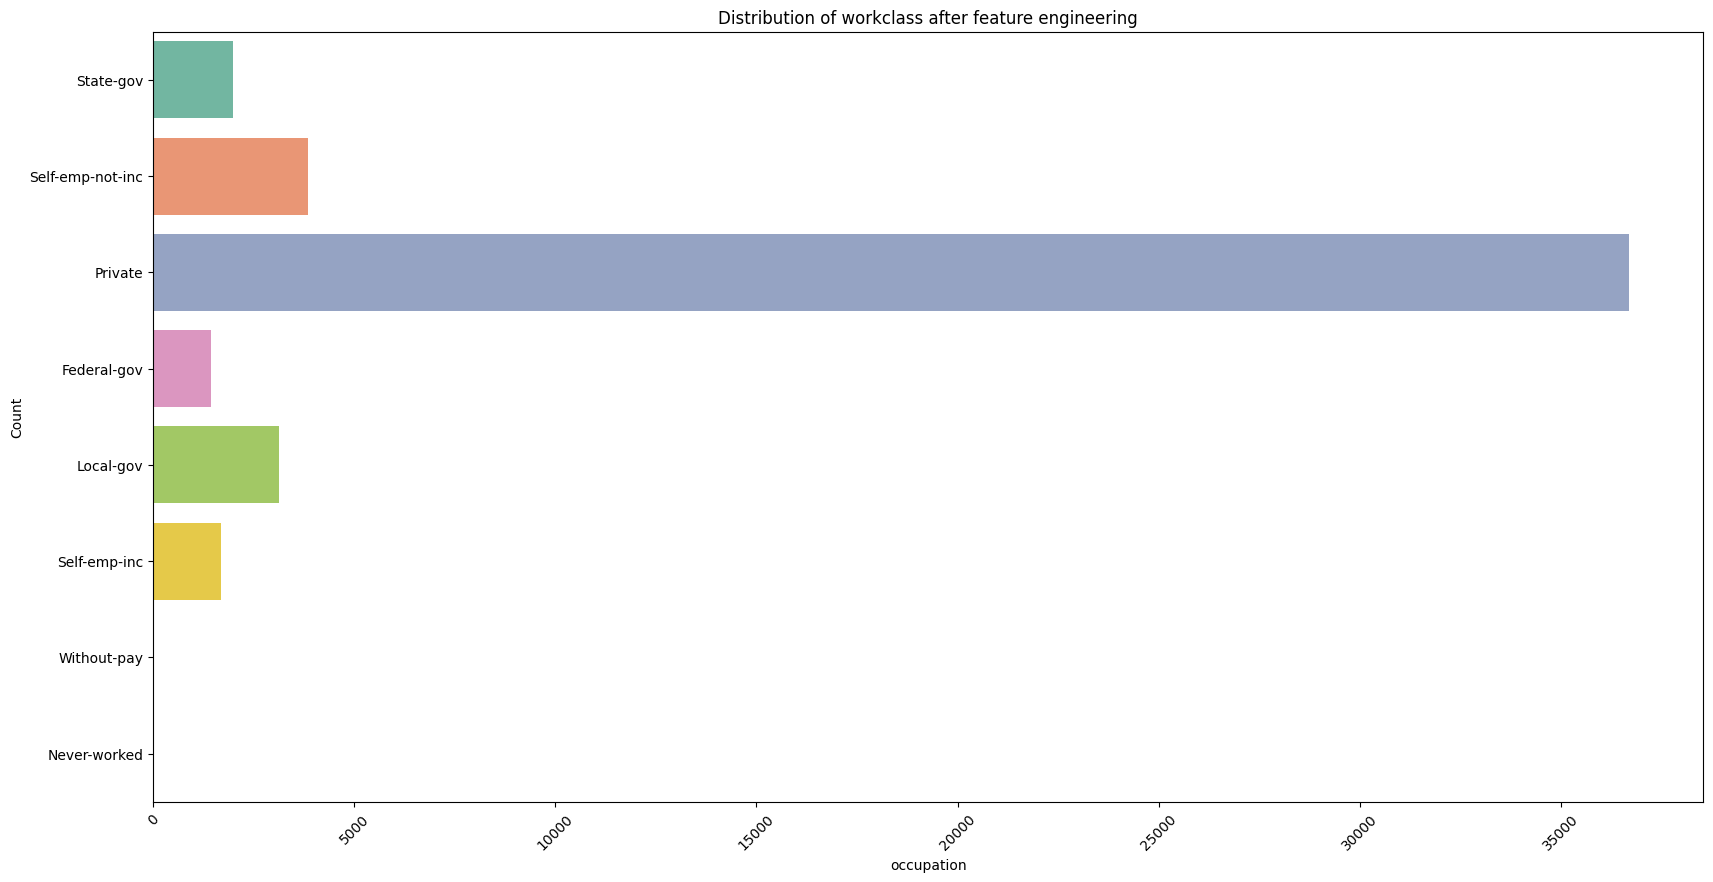

                  value_counts  ratio_to_highest_value_count  percentage
workclass                                                               
Private                  36705                      1.000000   75.150485
Self-emp-not-inc          3862                      0.105217    7.907129
Local-gov                 3136                      0.085438    6.420703
State-gov                 1981                      0.053971    4.055935
Self-emp-inc              1695                      0.046179    3.470374
Federal-gov               1432                      0.039014    2.931903
Without-pay                 21                      0.000572    0.042996
Never-worked                10                      0.000272    0.020474


In [149]:
selected_column=df['workclass']
plt.figure(figsize=(20, 10))
sns.countplot(y=selected_column, palette='Set2')
plt.title(f'Distribution of workclass after feature engineering')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

value_counts_(selected_column)

In [150]:
value_counts_(df[df['income']=='<=50K']['workclass'])

                  value_counts  ratio_to_highest_value_count  percentage
workclass                                                               
Private                  29053                      1.000000   59.483641
Self-emp-not-inc          2785                      0.095859    5.702060
Local-gov                 2209                      0.076033    4.522747
State-gov                 1451                      0.049943    2.970804
Federal-gov                871                      0.029980    1.783301
Self-emp-inc               757                      0.026056    1.549896
Without-pay                 19                      0.000654    0.038901
Never-worked                10                      0.000344    0.020474


In [151]:
value_counts_(df[df['income']=='>50K']['workclass'])

                  value_counts  ratio_to_highest_value_count  percentage
workclass                                                               
Private                   7652                      1.000000   15.666844
Self-emp-not-inc          1077                      0.140748    2.205069
Self-emp-inc               938                      0.122582    1.920478
Local-gov                  927                      0.121145    1.897957
Federal-gov                561                      0.073314    1.148602
State-gov                  530                      0.069263    1.085132
Without-pay                  2                      0.000261    0.004095


In [159]:
df[~(df['workclass']=='Never-worked')].head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School-or-below,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,School-or-below,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [158]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,School-or-below,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,School-or-below,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
government=['Local-gov', 'State-gov', 'Federal-gov']
self_employed=['Self-emp-not-inc','Self-emp-inc']


In [17]:
# Assuming 'X' is your pandas DataFrame
data = []

for column in ['workclass',  'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']:
    unique_values = X[column].value_counts()
    for value, count in unique_values.items():
        data.append({'Column Name': column, 
                     'Unique Value': value, 
                     'Value Count': count})

unique_value_table = pd.DataFrame(data)
unique_value_table.set_index(['Column Name', 'Unique Value','Value Count'], inplace=True)

unique_value_table


Empty DataFrame
Columns: []
Index: [(workclass, Private, 33906), (workclass, Self-emp-not-inc, 3862), (workclass, Local-gov, 3136), (workclass, State-gov, 1981), (workclass, ?, 1836), (workclass, Self-emp-inc, 1695), (workclass, Federal-gov, 1432), (workclass, Without-pay, 21), (workclass, Never-worked, 10), (education, HS-grad, 15784), (education, Some-college, 10878), (education, Bachelors, 8025), (education, Masters, 2657), (education, Assoc-voc, 2061), (education, 11th, 1812), (education, Assoc-acdm, 1601), (education, 10th, 1389), (education, 7th-8th, 955), (education, Prof-school, 834), (education, 9th, 756), (education, 12th, 657), (education, Doctorate, 594), (education, 5th-6th, 509), (education, 1st-4th, 247), (education, Preschool, 83), (marital-status, Married-civ-spouse, 22379), (marital-status, Never-married, 16117), (marital-status, Divorced, 6633), (marital-status, Separated, 1530), (marital-status, Widowed, 1518), (marital-status, Married-spouse-absent, 628), (marital-status, Married-AF-spouse, 37), (occupation, Prof-specialty, 6172), (occupation, Craft-repair, 6112), (occupation, Exec-managerial, 6086), (occupation, Adm-clerical, 5611), (occupation, Sales, 5504), (occupation, Other-service, 4923), (occupation, Machine-op-inspct, 3022), (occupation, Transport-moving, 2355), (occupation, Handlers-cleaners, 2072), (occupation, ?, 1843), (occupation, Farming-fishing, 1490), (occupation, Tech-support, 1446), (occupation, Protective-serv, 983), (occupation, Priv-house-serv, 242), (occupation, Armed-Forces, 15), (relationship, Husband, 19716), (relationship, Not-in-family, 12583), (relationship, Own-child, 7581), (relationship, Unmarried, 5125), (relationship, Wife, 2331), (relationship, Other-relative, 1506), (race, White, 41762), (race, Black, 4685), (race, Asian-Pac-Islander, 1519), (race, Amer-Indian-Eskimo, 470), (race, Other, 406), (sex, Male, 32650), (sex, Female, 16192), (native-country, United-States, 43832), (native-country, Mexico, 951), (native-country, ?, 583), (native-country, Philippines, 295), (native-country, Germany, 206), (native-country, Puerto-Rico, 184), (native-country, Canada, 182), (native-country, El-Salvador, 155), (native-country, India, 151), (native-country, Cuba, 138), (native-country, England, 127), (native-country, China, 122), (native-country, South, 115), (native-country, Jamaica, 106), (native-country, Italy, 105), (native-country, Dominican-Republic, 103), (native-country, Japan, 92), (native-country, Guatemala, 88), (native-country, Poland, 87), (native-country, Vietnam, 86), (native-country, Columbia, 85), (native-country, Haiti, 75), (native-country, Portugal, 67), (native-country, Taiwan, 65), (native-country, Iran, 59), (native-country, Greece, 49), (native-country, Nicaragua, 49), (native-country, Peru, 46), (native-country, Ecuador, 45), (native-country, France, 38), (native-country, Ireland, 37), (native-country, Hong, 30), (native-country, Thailand, 30), (native-country, Cambodia, 28), (native-country, Trinadad&Tobago, 27), (native-country, Laos, 23), (native-country, Yugoslavia, 23), (native-country, Outlying-US(Guam-USVI-etc), 23), (native-country, Scotland, 21), (native-country, Honduras, 20), ...]

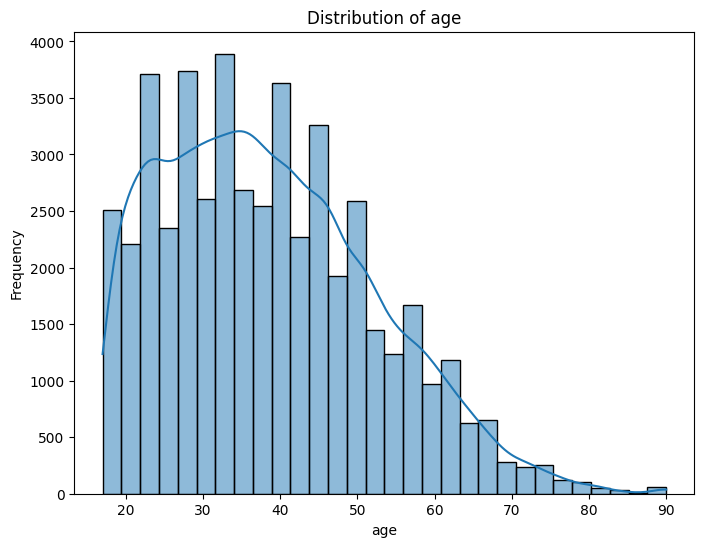

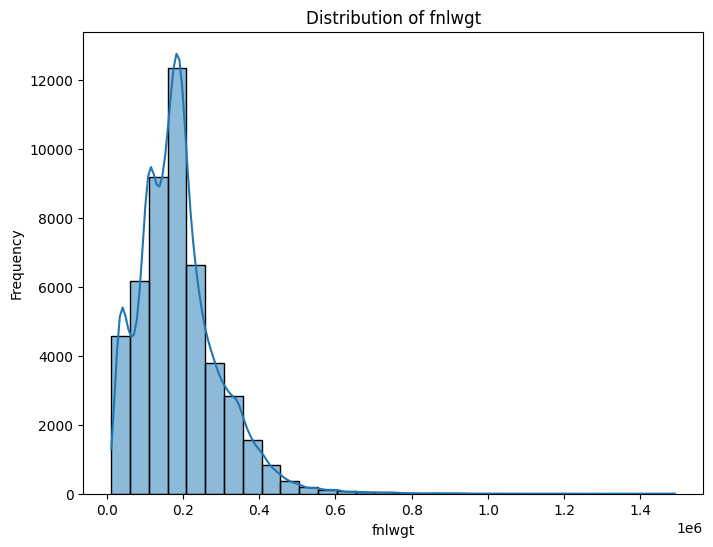

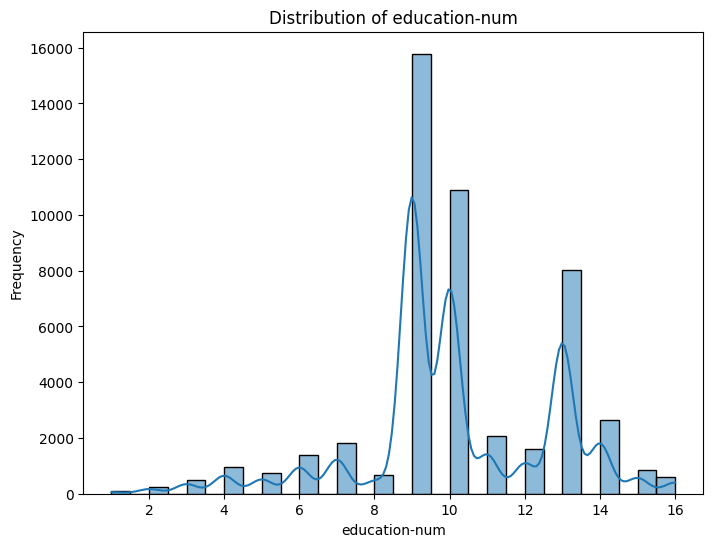

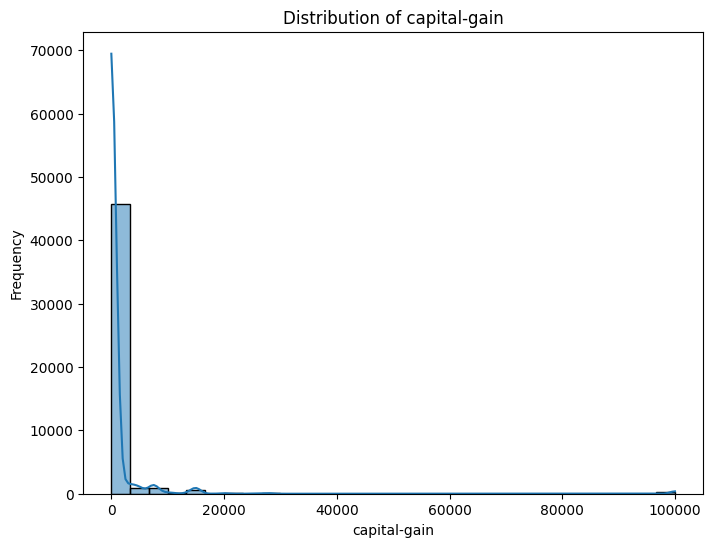

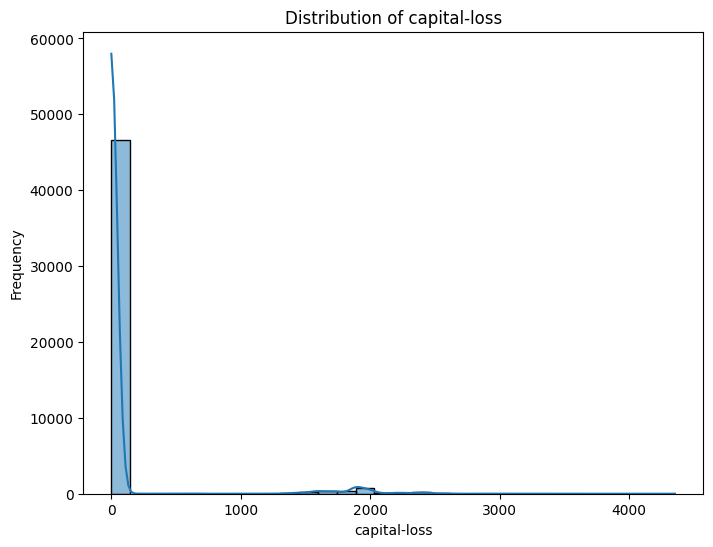

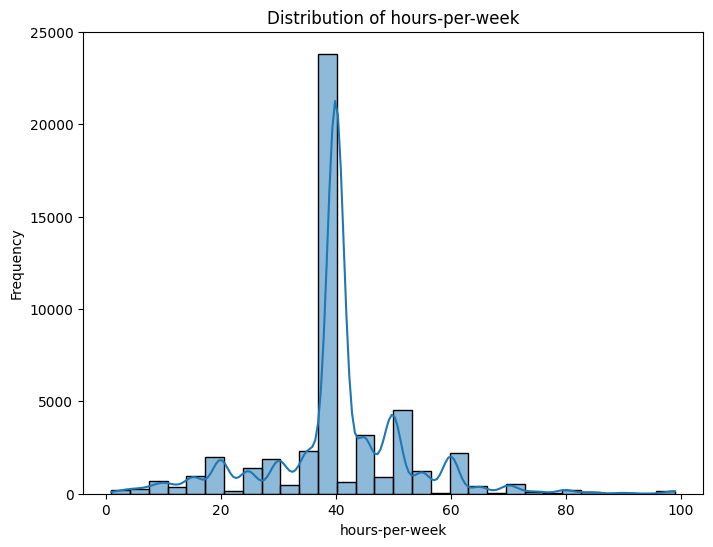

In [18]:
#numeric_features visulization
numeric_features =X.select_dtypes(include=['int', 'float']).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(X[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\janak\AppData\Local\Temp\ipykernel_200\4078217313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], palette='Set2')


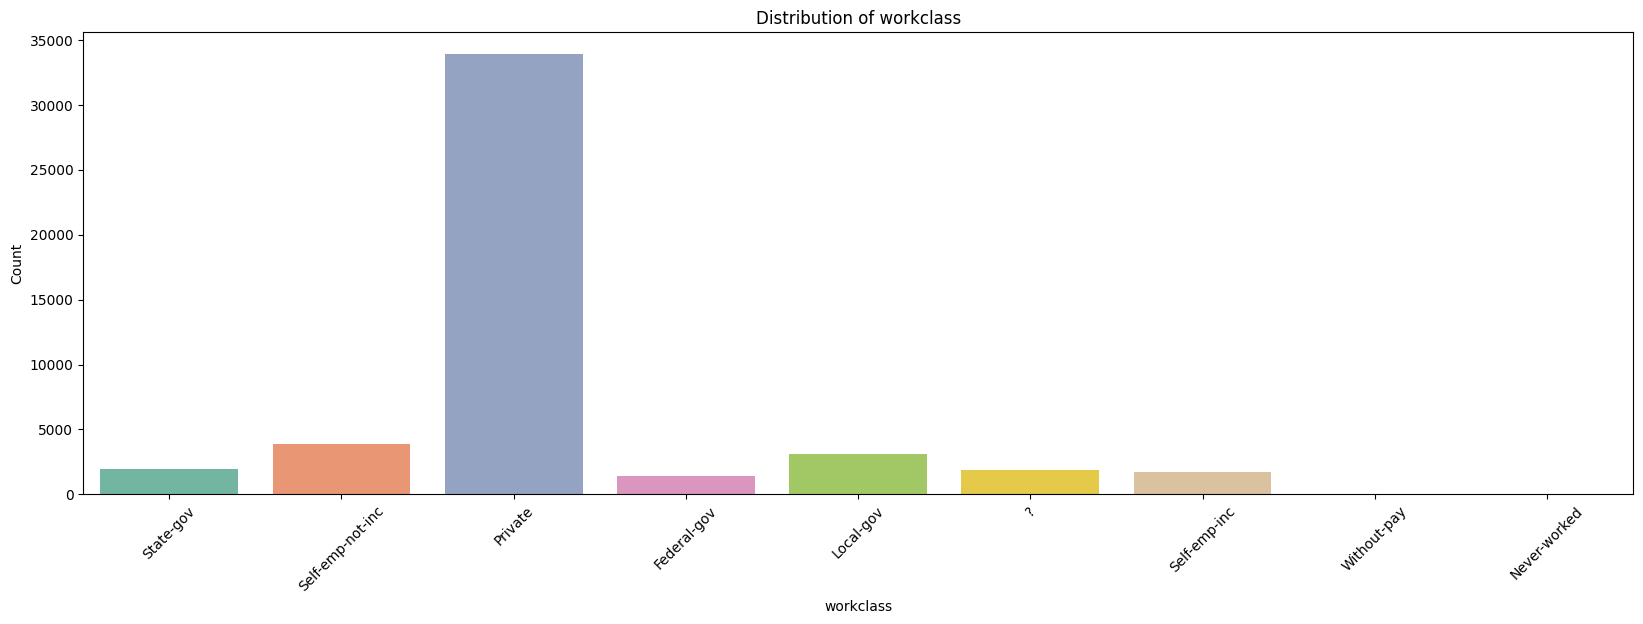

C:\Users\janak\AppData\Local\Temp\ipykernel_200\4078217313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], palette='Set2')


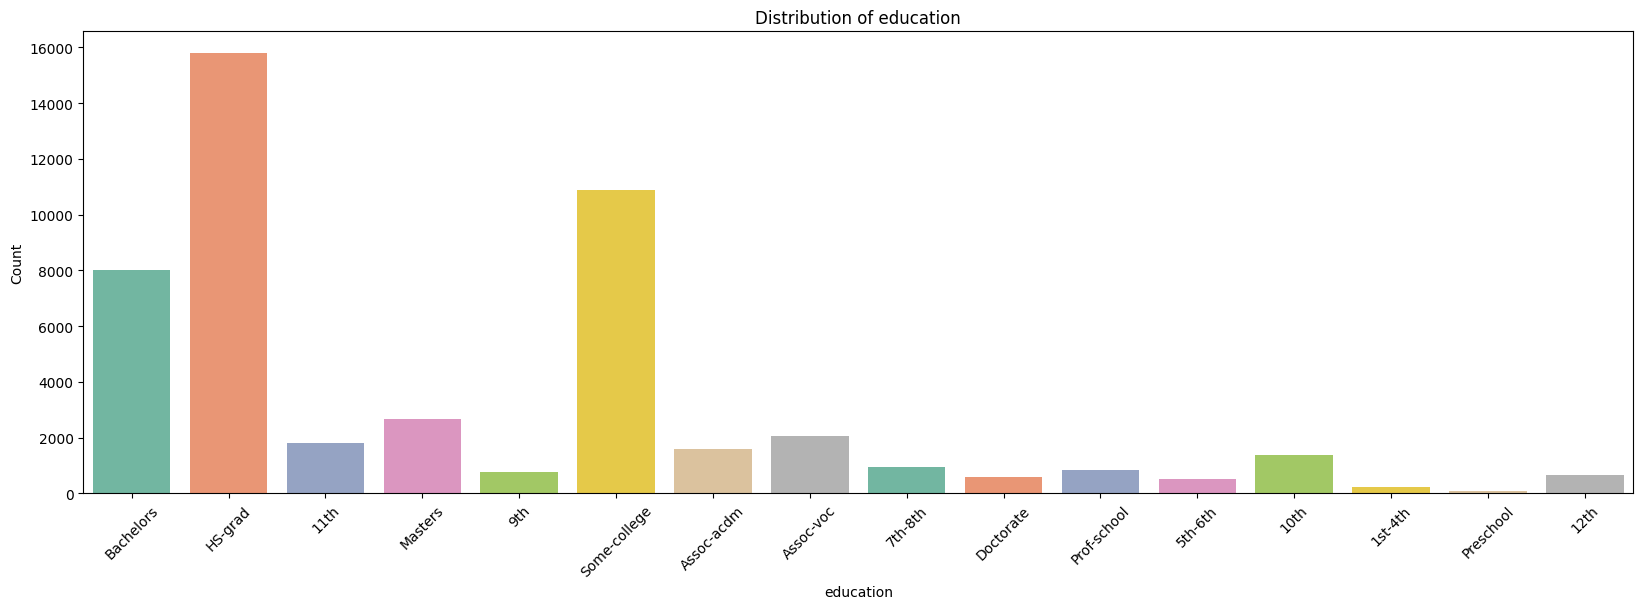

C:\Users\janak\AppData\Local\Temp\ipykernel_200\4078217313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], palette='Set2')


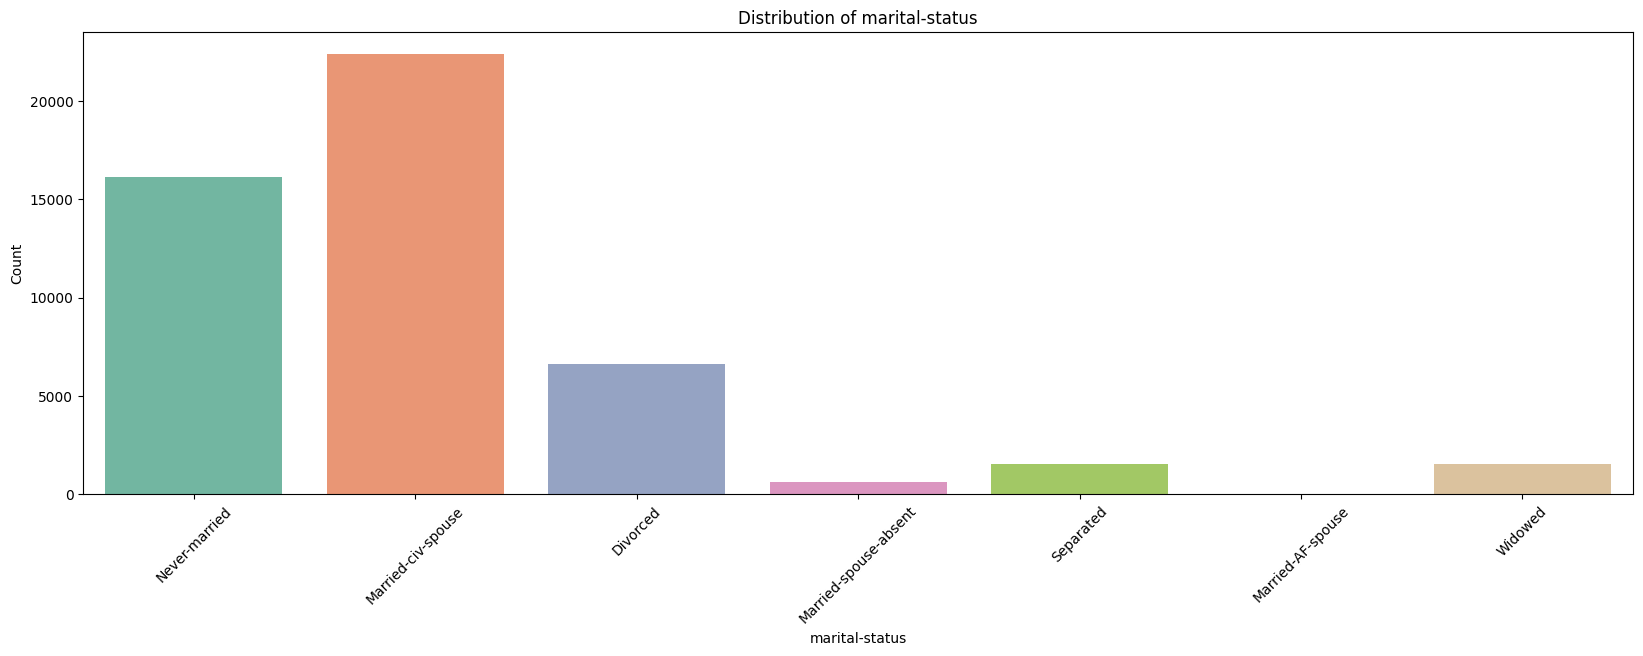

C:\Users\janak\AppData\Local\Temp\ipykernel_200\4078217313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], palette='Set2')


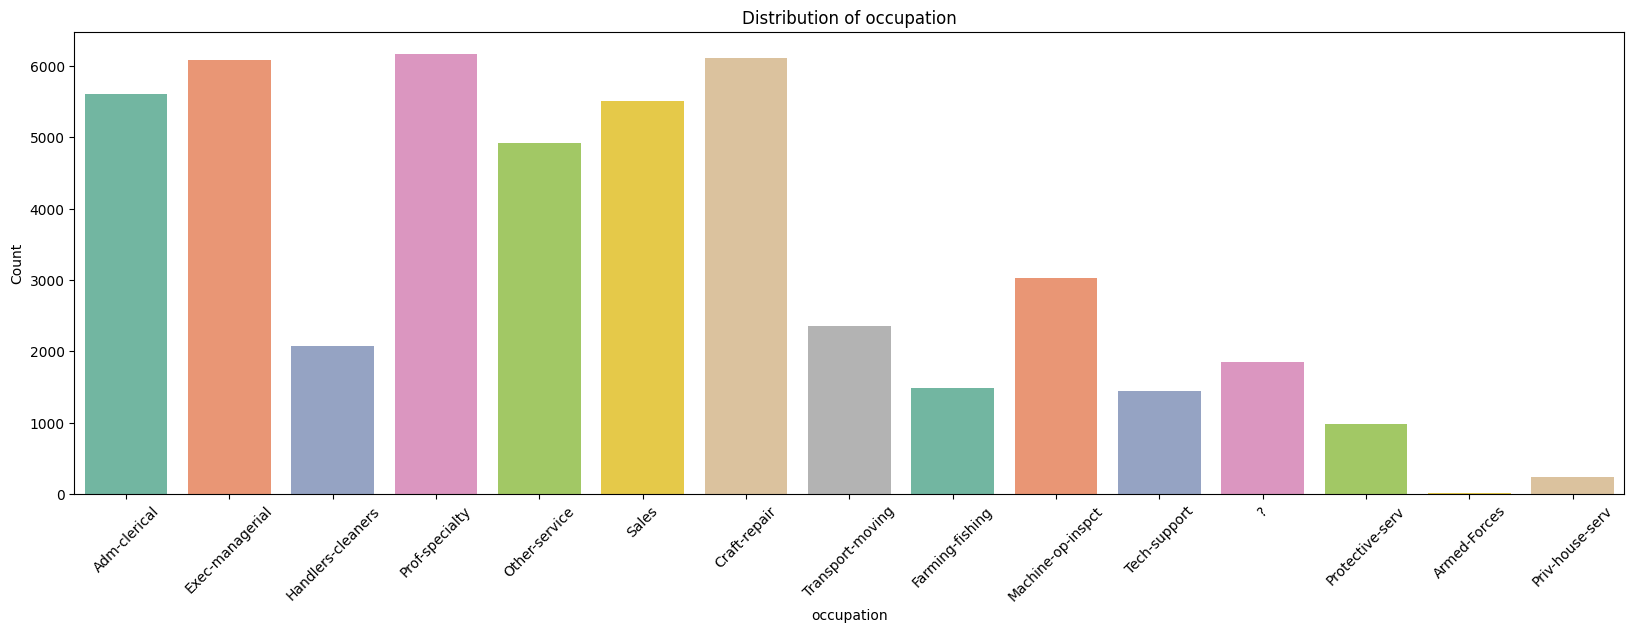

C:\Users\janak\AppData\Local\Temp\ipykernel_200\4078217313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], palette='Set2')


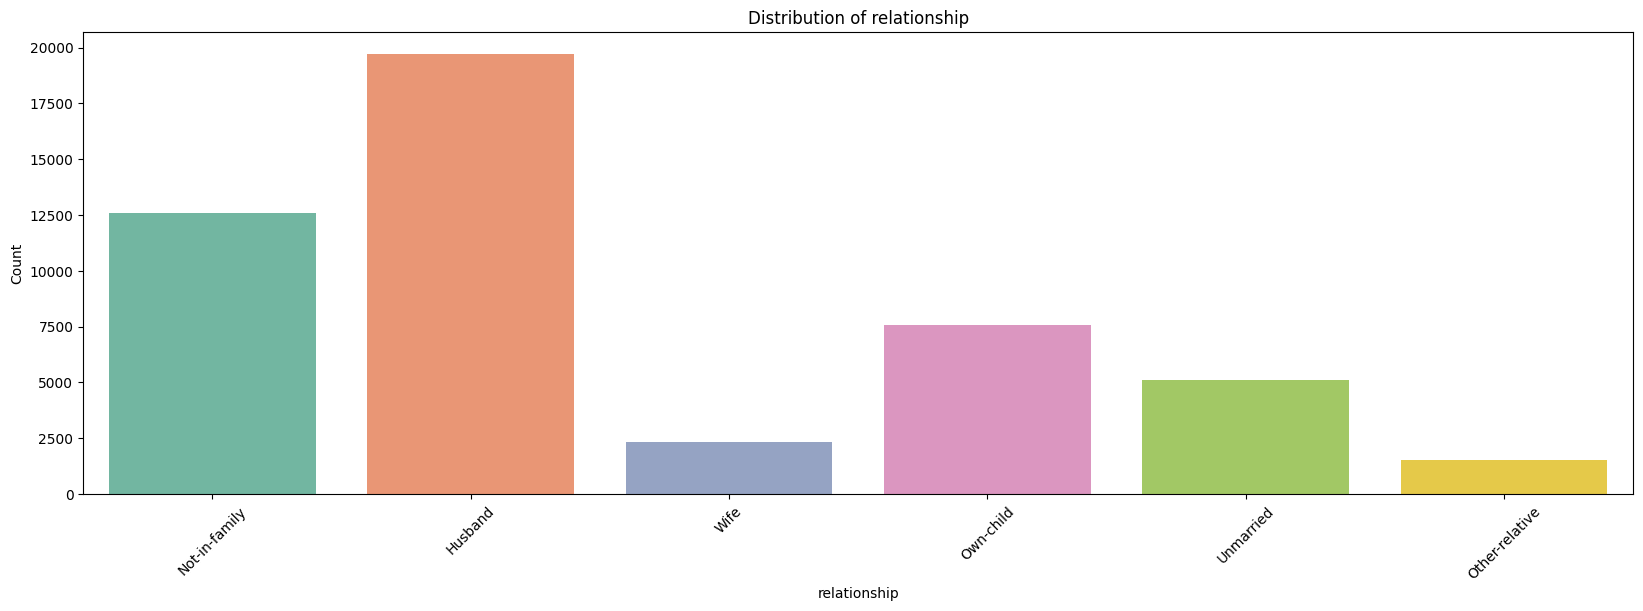

C:\Users\janak\AppData\Local\Temp\ipykernel_200\4078217313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], palette='Set2')


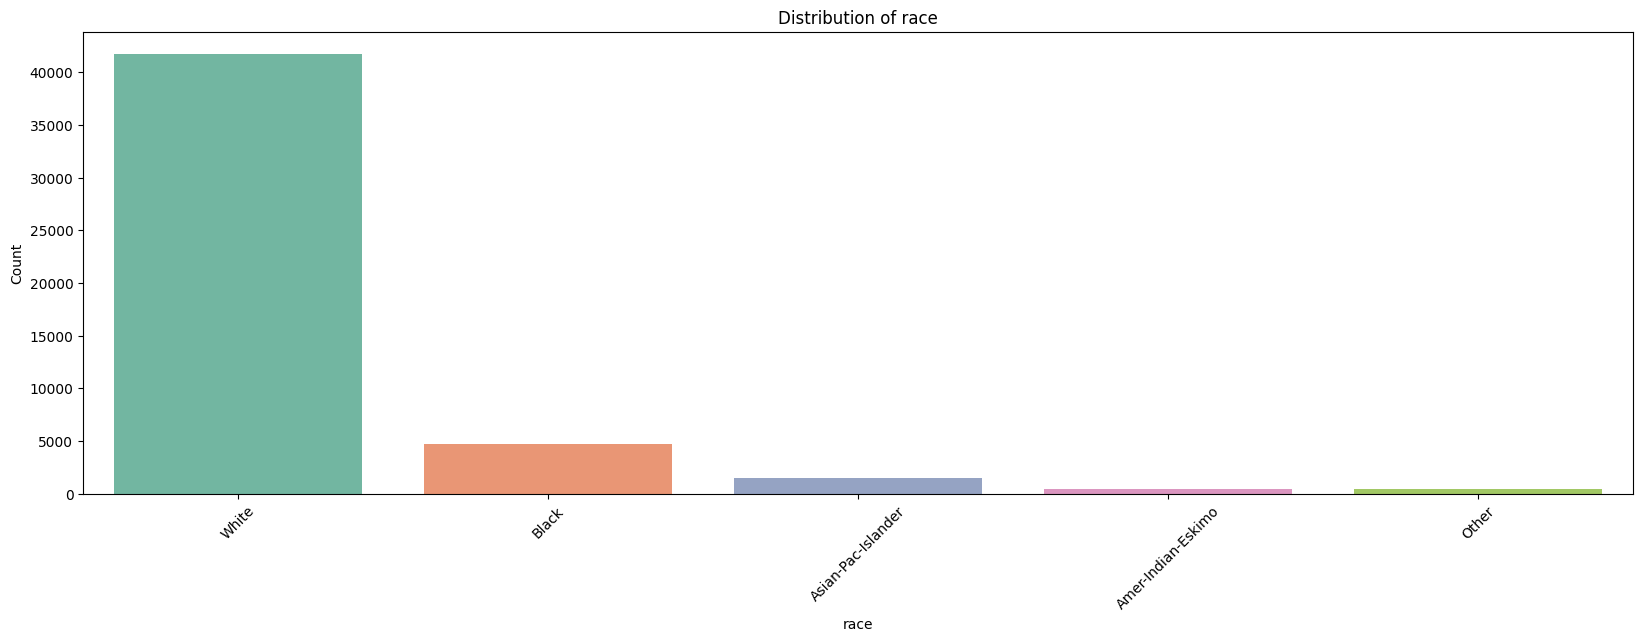

C:\Users\janak\AppData\Local\Temp\ipykernel_200\4078217313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], palette='Set2')


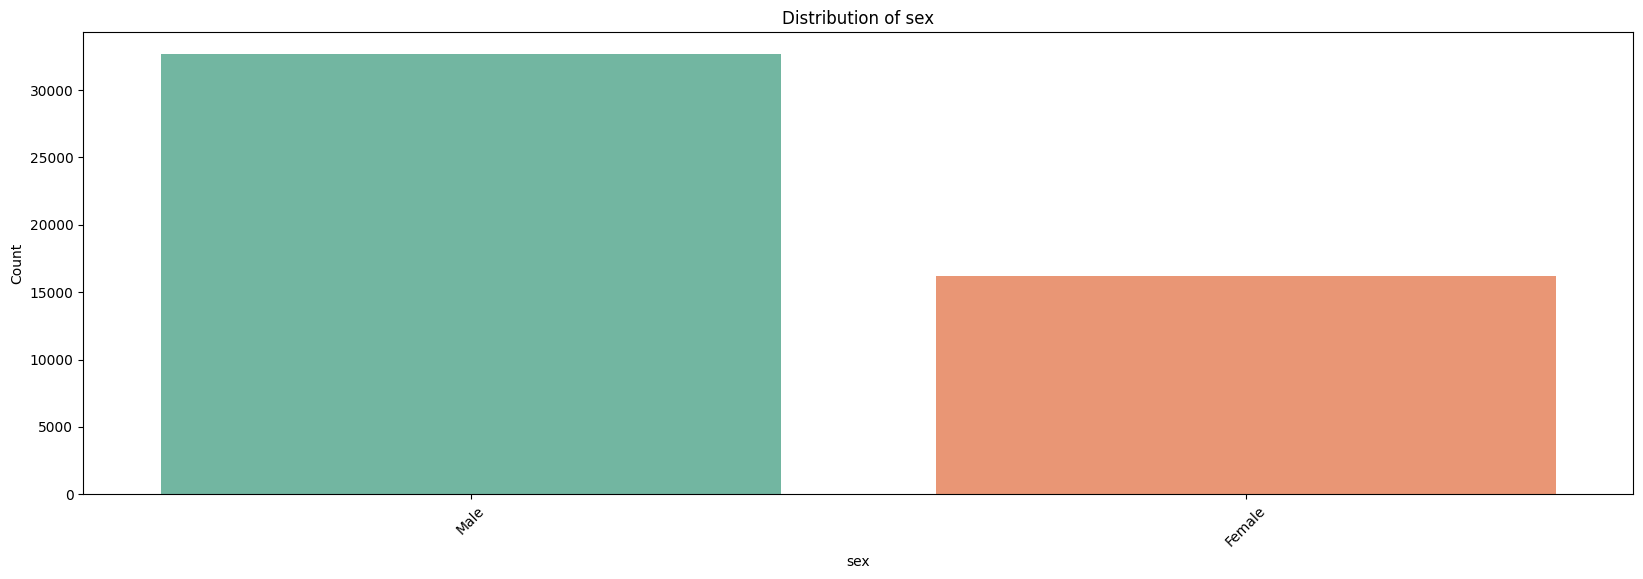

C:\Users\janak\AppData\Local\Temp\ipykernel_200\4078217313.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X[feature], palette='Set2')


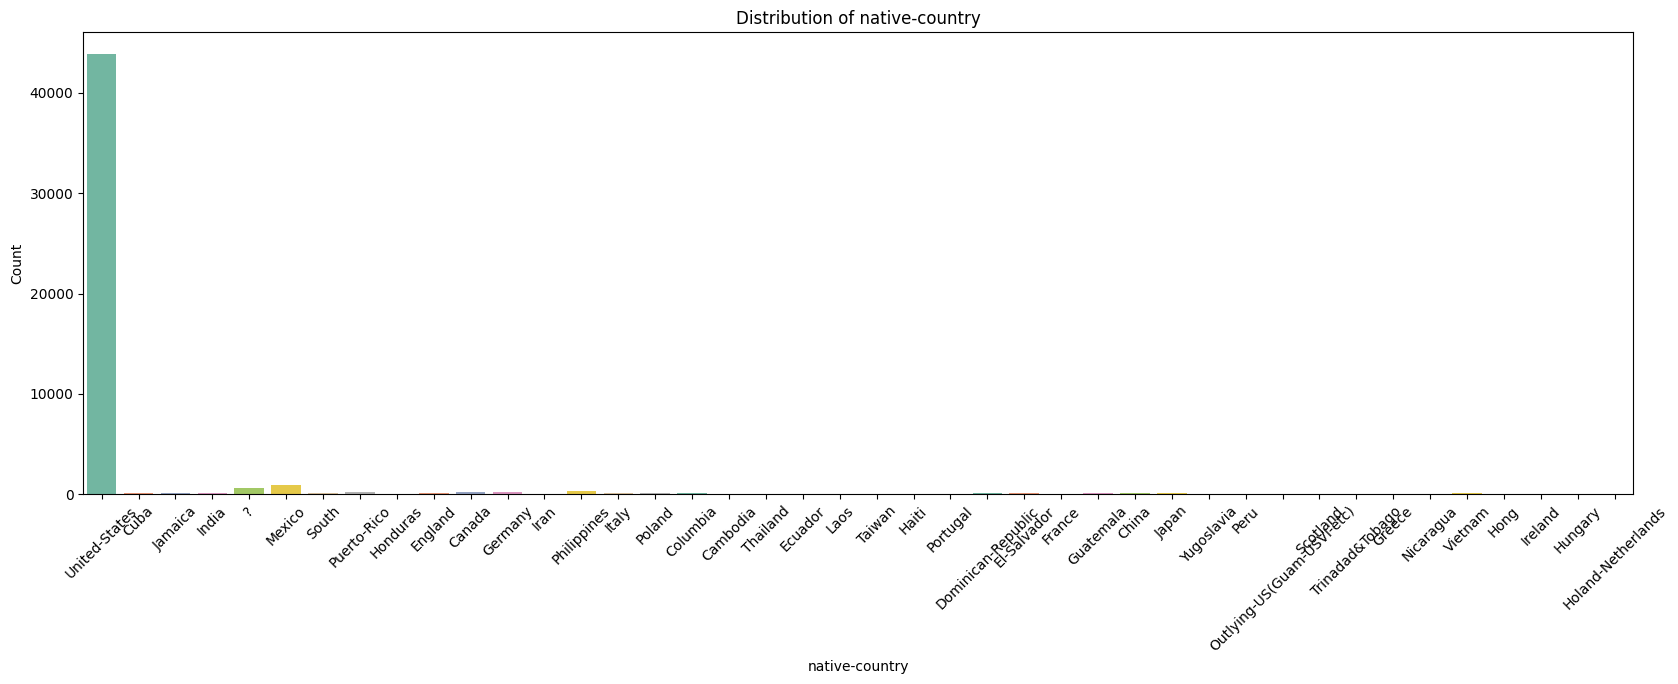

In [19]:
#categorical_features visualization
categorical_features = X.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(20, 6))
    sns.countplot(x=X[feature], palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
